In [21]:
import pandas as pd
import geopandas as gpd
import rasterio
import rasterio.features
import rasterio.warp
from rasterio.plot import show
#Importing the Nominatim geocoder class 
#from geopy.geocoders import Nominatim
from shapely.geometry import point, Polygon
import matplotlib as plt
from matplotlib import pyplot
import rioxarray
from pyproj import CRS

%matplotlib inline

## Download zip files from the following websites:

https://www.geopunt.be/download?container=dhm-vlaanderen-ii-dsm-raster-1m&title=Digitaal%20Hoogtemodel%20Vlaanderen%20II,%20DSM,%20raster,%201m
and 
https://www.geopunt.be/download?container=dhm-vlaanderen-ii-dtm-raster-1m&title=Digitaal%20Hoogtemodel%20Vlaanderen%20II,%20DTM,%20raster,%201m

In [3]:
from bs4 import BeautifulSoup
from urllib2 import *

sourcePage = urlopen(Request('https://www.geopunt.be/download?container=dhm-vlaanderen-ii-dsm-raster-1m&title=Digitaal%20Hoogtemodel%20Vlaanderen%20II,%20DSM,%20raster,%201m')) soup = BeautifulSoup(sourcePage.read())

SyntaxError: invalid syntax (Temp/ipykernel_6392/3595785940.py, line 4)

# Open geotiff files
## DTM - Digital Terrain Model file

In [63]:
terrain = rioxarray.open_rasterio("C:/Users/kasia/pyproj/3D_houses/DHMVIIDTMRAS1m_k01/GeoTIFF/DHMVIIDTMRAS1m_k01.tif", masked = True)
terrain

<xarray.DataArray (band: 1, y: 9000, x: 17000)>
[153000000 values with dtype=float32]
Coordinates:
  * band         (band) int32 1
  * x            (x) float64 1.45e+05 1.45e+05 1.45e+05 ... 1.62e+05 1.62e+05
  * y            (y) float64 2.47e+05 2.47e+05 2.47e+05 ... 2.38e+05 2.38e+05
    spatial_ref  int32 0
Attributes:
    STATISTICS_MAXIMUM:  33.270000457764
    STATISTICS_MEAN:     12.715703254367
    STATISTICS_MINIMUM:  3.1400001049042
    STATISTICS_STDDEV:   3.1190120842843
    scale_factor:        1.0
    add_offset:          0.0

In [23]:
print(terrain.rio.crs) # Coordinate Reference System
print(terrain.rio.nodata)
print(terrain.rio.bounds())
print(terrain.rio.width)
print(terrain.rio.height)

EPSG:31370
nan
(145000.0, 238000.0, 162000.0, 247000.0)
17000
9000


In [24]:
terrain.values

array([[[  nan,   nan,   nan, ..., 12.75, 12.79, 12.8 ],
        [  nan,   nan,   nan, ..., 12.8 , 12.81, 12.84],
        [  nan,   nan,   nan, ..., 12.84, 12.83, 12.88],
        ...,
        [ 4.52,  4.55,  4.57, ..., 16.8 , 16.93, 16.9 ],
        [ 4.49,  4.57,  4.58, ..., 16.91, 16.91, 16.93],
        [ 4.48,  4.55,  4.57, ..., 16.86, 16.88, 16.9 ]]], dtype=float32)

In [25]:
type(terrain)

xarray.core.dataarray.DataArray

In [26]:
print(terrain.rio.crs) # database of CRS information, each has a specific number

EPSG:31370


In [27]:
print(terrain.rio.crs.to_epsg())

31370


In [28]:
epsg = terrain.rio.crs.to_epsg()
crs = CRS(epsg)
crs

# Axis Info: the CRS shows a Cartesian system with two axis, an easting and northing, in meter units.
# Area of Use: the projection is used for a particular range of longitudes 
# Coordinate Operation: the operation to project the coordinates (if it is projected) on to a cartesian (x, y) plane.
# Datum: Details about the datum, or the reference point for coordinates.

<Projected CRS: EPSG:31370>
Name: BD72 / Belgian Lambert 72
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Belgium - onshore.
- bounds: (2.5, 49.5, 6.4, 51.51)
Coordinate Operation:
- name: Belgian Lambert 72
- method: Lambert Conic Conformal (2SP)
Datum: Reseau National Belge 1972
- Ellipsoid: International 1924
- Prime Meridian: Greenwich

In [29]:
crs.area_of_use

AreaOfUse(west=2.5, south=49.5, east=6.4, north=51.51, name='Belgium - onshore.')

In [30]:
crs.axis_info

[Axis(name=Easting, abbrev=X, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Northing, abbrev=Y, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

In [31]:
terrain.rio.crs.linear_units

'metre'

In [32]:
print(terrain.min())
print(terrain.max())
print(terrain.mean())
print(terrain.std())

<xarray.DataArray ()>
array(3.14, dtype=float32)
Coordinates:
    spatial_ref  int32 0
<xarray.DataArray ()>
array(33.27, dtype=float32)
Coordinates:
    spatial_ref  int32 0
<xarray.DataArray ()>
array(12.715716, dtype=float32)
Coordinates:
    spatial_ref  int32 0
<xarray.DataArray ()>
array(3.1190107, dtype=float32)
Coordinates:
    spatial_ref  int32 0


In [33]:
print(terrain.quantile([0.25, 0.75]))

<xarray.DataArray (quantile: 2)>
array([10.44999981, 14.98999977])
Coordinates:
  * quantile  (quantile) float64 0.25 0.75


In [38]:
terrain.shape

(1, 9000, 17000)

In [39]:
terrain_ra = rasterio.open('C:/Users/kasia/pyproj/3D_houses/DHMVIIDTMRAS1m_k01/GeoTIFF/DHMVIIDTMRAS1m_k01.tif')
terrain_ra

<open DatasetReader name='C:/Users/kasia/pyproj/3D_houses/DHMVIIDTMRAS1m_k01/GeoTIFF/DHMVIIDTMRAS1m_k01.tif' mode='r'>

In [65]:
terrain_ra.count

1

In [66]:
terrain_ra.width

17000

In [67]:
terrain_ra.height

9000

In [69]:
terrain_ra.bounds

BoundingBox(left=145000.0, bottom=238000.0, right=162000.0, top=247000.0)

In [70]:
terrain_ra.crs

CRS.from_epsg(31370)

In [42]:
print(terrain_ra.shape)

(9000, 17000)


In [43]:
terrain_ra.read()

array([[[-9.999e+03, -9.999e+03, -9.999e+03, ...,  1.275e+01,
          1.279e+01,  1.280e+01],
        [-9.999e+03, -9.999e+03, -9.999e+03, ...,  1.280e+01,
          1.281e+01,  1.284e+01],
        [-9.999e+03, -9.999e+03, -9.999e+03, ...,  1.284e+01,
          1.283e+01,  1.288e+01],
        ...,
        [ 4.520e+00,  4.550e+00,  4.570e+00, ...,  1.680e+01,
          1.693e+01,  1.690e+01],
        [ 4.490e+00,  4.570e+00,  4.580e+00, ...,  1.691e+01,
          1.691e+01,  1.693e+01],
        [ 4.480e+00,  4.550e+00,  4.570e+00, ...,  1.686e+01,
          1.688e+01,  1.690e+01]]], dtype=float32)

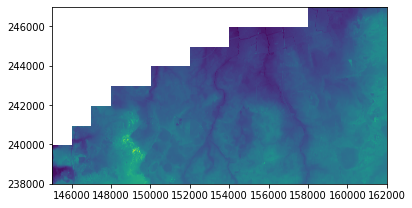

<AxesSubplot:>

In [44]:
show(terrain_ra)

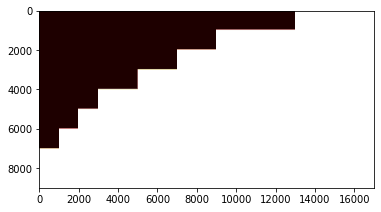

In [72]:
pyplot.imshow(terrain_ra.read(1), cmap='pink')
pyplot.show()

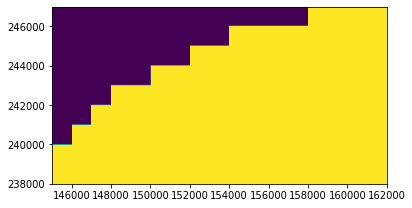

<AxesSubplot:>

In [74]:
show(terrain_ra.read(), transform=terrain_ra.transform, cmap='viridis')

## DSM - Digital Surface Model file

In [45]:
surface = rioxarray.open_rasterio("C:/Users/kasia/pyproj/3D_houses/DHMVIIDSMRAS1m_k01/GeoTIFF/DHMVIIDSMRAS1m_k01.tif", masked = True)
surface

<xarray.DataArray (band: 1, y: 9000, x: 17000)>
[153000000 values with dtype=float32]
Coordinates:
  * band         (band) int32 1
  * x            (x) float64 1.45e+05 1.45e+05 1.45e+05 ... 1.62e+05 1.62e+05
  * y            (y) float64 2.47e+05 2.47e+05 2.47e+05 ... 2.38e+05 2.38e+05
    spatial_ref  int32 0
Attributes:
    STATISTICS_MAXIMUM:  98.559997558594
    STATISTICS_MEAN:     15.598165931673
    STATISTICS_MINIMUM:  -3.25
    STATISTICS_STDDEV:   7.0595914207194
    scale_factor:        1.0
    add_offset:          0.0

In [50]:
surface.shape

(1, 9000, 17000)

In [51]:
surface_ra = rasterio.open('C:/Users/kasia/pyproj/3D_houses/DHMVIIDSMRAS1m_k01/GeoTIFF/DHMVIIDSMRAS1m_k01.tif')

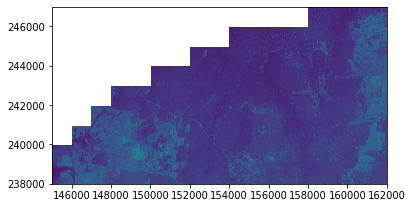

<AxesSubplot:>

In [52]:
show(surface_ra)

In [53]:
terrain_matched = terrain.rio.reproject_match(surface)

In [54]:
canopy = surface - terrain_matched
canopy.compute()

<xarray.DataArray (band: 1, y: 9000, x: 17000)>
array([[[       nan,        nan,        nan, ..., 0.        ,
         0.        , 0.        ],
        [       nan,        nan,        nan, ..., 0.        ,
         0.        , 0.        ],
        [       nan,        nan,        nan, ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.02000046],
        [0.        , 0.        , 0.        , ..., 0.01000023,
         0.        , 0.01000023]]], dtype=float32)
Coordinates:
  * band         (band) int32 1
  * x            (x) float64 1.45e+05 1.45e+05 1.45e+05 ... 1.62e+05 1.62e+05
  * y            (y) float64 2.47e+05 2.47e+05 2.47e+05 ... 2.38e+05 2.38e+05
    spatial_ref  int32 0

In [55]:
print(canopy.min())
print(canopy.max())
print(canopy.mean())
print(canopy.std())

<xarray.DataArray ()>
array(-13.79, dtype=float32)
Coordinates:
    spatial_ref  int32 0
<xarray.DataArray ()>
array(91.4532, dtype=float32)
Coordinates:
    spatial_ref  int32 0
<xarray.DataArray ()>
array(2.8824549, dtype=float32)
Coordinates:
    spatial_ref  int32 0
<xarray.DataArray ()>
array(5.4895062, dtype=float32)
Coordinates:
    spatial_ref  int32 0


## Open .shp file

In [56]:
path = 'C:/Users/kasia/pyproj/3D_houses/DHMVIIDTMRAS1m_k01/DHMVII_vdc_k01/DHMVII_vdc_k01.shp'

In [57]:
test = gpd.read_file(path)

In [58]:
test

,Id,OpnDatum1,OpnDatum2,geometry
0,0,2013-02-20,None,"MULTIPOLYGON Z (((162079.010 238604.770 0.000,..."
1,0,2013-04-01,None,"POLYGON Z ((148803.300 243432.780 0.000, 14882..."
2,0,2013-02-20,2013-04-01,"MULTIPOLYGON Z (((156554.470 243736.800 0.000,..."


<AxesSubplot:>

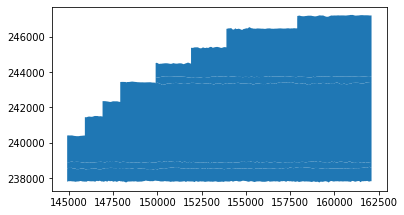

In [59]:
test.plot()

## Geocode the provided address:

In [148]:
address = 'Tolhuis, Sint-Pietersvliet 7, 2000 Antwerpen'

In [8]:
location = gpd.tools.geocode(address)

In [9]:
location

,geometry,address
0,POINT (4.40084 51.22561),"The Beacon (Tolhuis), 7, Sint-Pietersvliet, 20..."


## Re-Projecting: Transforming the representation of locations (coordinates) from one coordinate system (EPSG) to another *https://geopandas.readthedocs.io/en/latest/docs/user_guide/projections.html

In [142]:
.to_crs("EPSG:4326")

SyntaxError: invalid syntax (Temp/ipykernel_13784/1035018759.py, line 1)

In [64]:
terrain_4326 = terrain.rio.reproject("EPSG:4326") #https://corteva.github.io/rioxarray/stable/examples/reproject.html
terrain_4326

<xarray.DataArray (band: 1, y: 6047, x: 18283)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * x            (x) float64 4.297 4.297 4.297 4.297 ... 4.542 4.542 4.542 4.542
  * y            (y) float64 51.53 51.53 51.53 51.53 ... 51.45 51.45 51.45 51.45
  * band         (band) int32 1
    spatial_ref  int32 0
Attributes:
    STATISTICS_MAXIMUM:  33.270000457764
    STATISTICS_MEAN:     12.715703254367
    STATISTICS_MINIMUM:  3.1400001049042
    STATISTICS_STDDEV:   3.1190120842843
    scale_factor:        1.0
    add_offset:          0.0